# Data Visualization with PCA
---
The purpose of this code is to visualize a given data using PCA

## Importing Needed Tools

In [1]:
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Implementing PCA
1. Importing Data

The idea for this implementation is to use the features psoda, pfries, pentree, prpblck, prpncar, and wagest.

In [2]:
# Importing Data
dat1 = pd.read_csv("Data1.csv")
# Cleaning Rows with NaN
dat1_cln = dat1.dropna()
# Separating the needed features from the full data
dat_feat = ['psoda','pfries','pentree','prpblck','prpncar','wagest']
dat2 = pd.DataFrame(data = dat1_cln, columns = dat_feat)

# Output dat2
dat2

,psoda,pfries,pentree,prpblck,prpncar,wagest
0,1.12,1.06,1.02,0.171154,0.078843,4.25
1,1.06,0.91,0.95,0.171154,0.078843,4.75
2,1.06,0.91,0.98,0.047360,0.269430,4.25
3,1.12,1.02,1.06,0.052839,0.136690,5.00
5,1.06,0.95,1.01,0.059133,0.115134,4.25
...,...,...,...,...,...,...
405,1.11,1.05,0.94,0.029728,0.035946,4.50
406,0.95,0.74,2.33,0.058840,0.100693,4.75
407,0.97,0.84,0.91,0.058840,0.100693,4.25
408,0.97,0.86,0.89,0.058840,0.100693,4.75


2. Standardizing Data and Creating Principal Components

In [3]:
# Standardizing dat2
dat2_std = StandardScaler().fit_transform(dat2)
# Creating principal components of dat2
C_Number = 3 # Number of components
pca = PCA(n_components = C_Number) 
P_Components = pca.fit_transform(dat2_std)
# Creating columns 
PC_Col = []
for n in range(C_Number):
    PC_Col.append("Principal Component " + str(n + 1))

P_Dat = pd.DataFrame(data = P_Components, columns = PC_Col)
# Output Principal Components
P_Dat

,Principal Component 1,Principal Component 2,Principal Component 3
0,1.074830,-1.010098,-0.895452
1,-0.055101,-0.329550,-0.108281
2,0.631007,0.471511,-1.239120
3,0.466012,-1.431340,0.427774
4,0.157252,-0.208272,-1.086703
...,...,...,...
333,0.253024,-1.553626,-0.606630
334,-1.447606,1.582643,1.228599
335,-0.804222,0.775268,-1.270535
336,-0.961364,0.260543,-0.335456


In [4]:
# The percentage of information contained in the principal components
PC_Accuracy = str(round(sum(pca.explained_variance_ratio_)*100,1)) + '%'
PC_Accuracy

'75.9%'

3. Projecting into N-Dimension

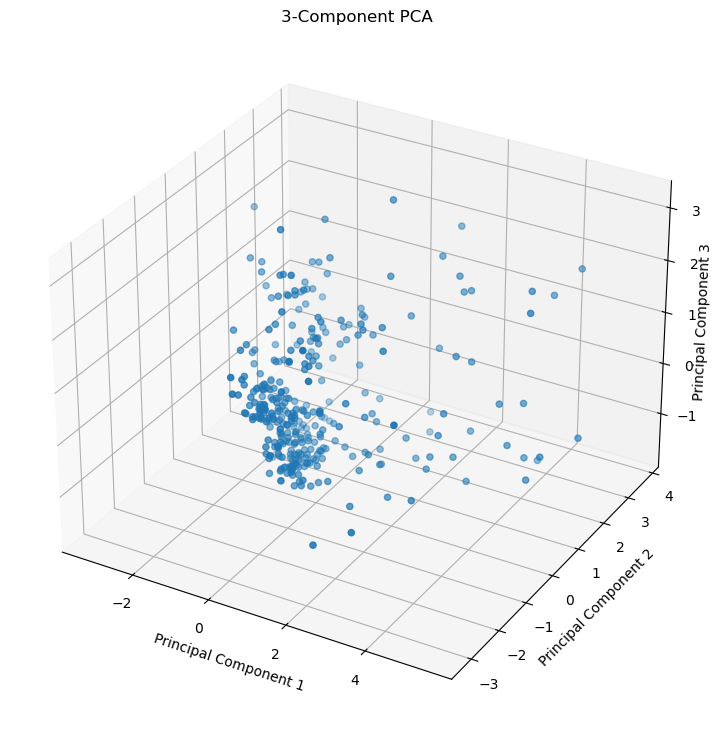

In [5]:
fig = plt.figure(figsize = (16,9))
if C_Number == 2:
    # Plotting for 2-Dimension PCA
    plt.scatter(P_Components[:,0],P_Components[:,1])
    plt.xlabel(PC_Col[0])
    plt.ylabel(PC_Col[1])
    plt.title('2-Component PCA')
    plt.grid()
    plt.show()
elif C_Number == 3:
    # Plotting for 3-Dimension PCA
    ax = plt.axes(projection='3d')
    ax.scatter3D(P_Components[:,0],P_Components[:,1],P_Components[:,2])
    ax.set_xlabel(PC_Col[0])
    ax.set_ylabel(PC_Col[1])
    ax.set_zlabel(PC_Col[2],rotation=90)
    ax.zaxis.labelpad=-4
    ax.set_title('3-Component PCA')
    plt.show()
else:
    print('Unable to plot the PCA')